In [2]:
# 미리 설치
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [15]:
import os
import glob
from ultralytics import YOLO
from roboflow import Roboflow
from google.colab import files

In [4]:
rf = Roboflow(api_key="2IdzhOaQifRbgFhqIk6V")
project = rf.workspace("food-hofna").project("food-detection-fme3o")
version = project.version(8)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food-Detection-8 in yolov8:: 100%|██████████| 1176/1176 [00:00<00:00, 2489.01it/s]


In [5]:
model = YOLO('yolov8n.pt')

In [6]:
results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=100,
    imgsz=640
)

Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Food-Detection-8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

In [ ]:
# 테스트 시각화


In [10]:
trained_model = YOLO('runs/detect/train/weights/best.pt')
test_image_path='/content/istockphoto-1442417585-612x612.jpg'


In [11]:
results = trained_model.predict(source=test_image_path)


image 1/1 /content/istockphoto-1442417585-612x612.jpg: 448x640 1 pizza, 1 salad, 44.8ms
Speed: 2.6ms preprocess, 44.8ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


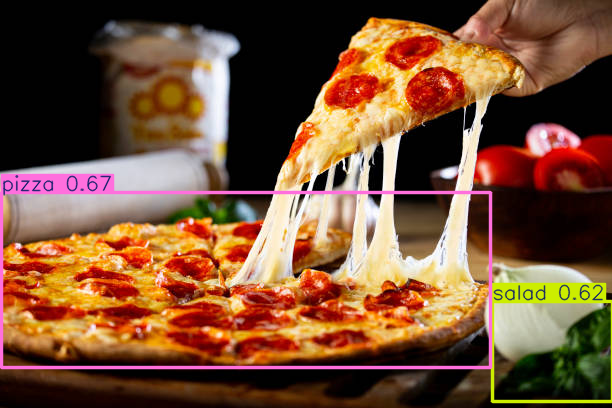

In [12]:
results[0].show()

In [16]:
# 1차 학습된 모델 다운로드
model_path = os.path.join('runs', 'detect', 'train', 'weights', 'best.pt')
if os.path.exists(model_path):
    files.download(model_path)
    print("모델 다운로드가 시작되었습니다.")
else:
    print("파일을 찾을 수 없습니다. 경로를 확인해 주세요.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

모델 다운로드가 시작되었습니다.
